This simple notebook goes through using kMeans on PCA-reduced data and non-reduced data, using the ever-ubiquitous Iris dataset. 

In [1]:
import os
import pandas as pd
import requests
from io import StringIO
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = StringIO(requests.get(url).text)

In [4]:
df = pd.read_csv(data, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

In [5]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com

## Main Equations and Variable Definitions
$X_{raw}$ is the $n \times p$ data matrix with $n$ rows of data points and $p$ columns of features. 

$X$ is the standardized data matrix using the StandardScaler. $X$ has a mean of 0 and a variance of 1

Let $V$ be the $p \times k$ matrix of eigenvectors where $k$ is the number of principle components we want to keep. 

The $n \times k$ matrix of of PCA projections is then given by $Z = XV$

If we want to reverse PCA, we can map an arbitrary point $z$ in PCA space to the original space by calculating $\hat{x} = zV^{T}$ and then reversing the StandardScaler

# Standardizing the Data to have a mean of 0 and a variance of 1

In [6]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
X_raw = df.loc[:, features].values
X_raw

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In this example, $n = 150$ and $p = 4$ so we expect $X_{raw}$ and $X$ to be a $150 \times 4$ matrix

In [7]:
X_raw.shape

(150, 4)

In [8]:
# Finally, standardizing the features
scaler = StandardScaler()
scaler.fit(X_raw)
X = scaler.transform(X_raw)
X

array([[ -9.00681170e-01,   1.03205722e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,  -1.24957601e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.38535265e+00,   3.37848329e-01,  -1.39813811e+00,
         -1.31297673e+00],
       [ -1.50652052e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.02184904e+00,   1.26346019e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -5.37177559e-01,   1.95766909e+00,  -1.17067529e+00,
         -1.05003079e+00],
       [ -1.50652052e+00,   8.00654259e-01,  -1.34127240e+00,
         -1.18150376e+00],
       [ -1.02184904e+00,   8.00654259e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.74885626e+00,  -3.56360566e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.44444970e+00],
       [ -5.37177559e-01,   1.49486315e+00,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.26418478e

# PCA Projection
We're keeping 2 components so $k = 2$ and $V$ is then a $4 \times 2$ matrix and $Z$ is a $150 \times 2$ matrix

pca.fit_transform(X) gives us $Z$

In [9]:
pca = PCA(n_components = "mle") # reducing down from 4 dimensions
# You can also do
#pca = PCA(n_components = 0.95) # picks as many components necessary to get the sum of explained_variance_ratio_ to be 0.95
#pca = PCA(n_components = "mle") # number of components chosen by Minka's MLE algorithm

Z = pca.fit_transform(X)
Z

array([[ -2.26454173e+00,   5.05703903e-01,  -1.21943348e-01],
       [ -2.08642550e+00,  -6.55404729e-01,  -2.27250832e-01],
       [ -2.36795045e+00,  -3.18477311e-01,   5.14796236e-02],
       [ -2.30419716e+00,  -5.75367713e-01,   9.88604444e-02],
       [ -2.38877749e+00,   6.74767397e-01,   2.14278490e-02],
       [ -2.07053681e+00,   1.51854856e+00,   3.06842583e-02],
       [ -2.44571134e+00,   7.45626750e-02,   3.42197636e-01],
       [ -2.23384186e+00,   2.47613932e-01,  -8.25744645e-02],
       [ -2.34195768e+00,  -1.09514636e+00,   1.53562399e-01],
       [ -2.18867576e+00,  -4.48629048e-01,  -2.46559522e-01],
       [ -2.16348656e+00,   1.07059558e+00,  -2.64009373e-01],
       [ -2.32737775e+00,   1.58587455e-01,   1.00165616e-01],
       [ -2.22408272e+00,  -7.09118158e-01,  -2.23214514e-01],
       [ -2.63971626e+00,  -9.38281982e-01,   1.89570030e-01],
       [ -2.19229151e+00,   1.88997851e+00,  -4.69480095e-01],
       [ -2.25146521e+00,   2.72237108e+00,   3.2603796

In [10]:
# mle chose 3 components to keep
Z.shape

(150, 3)

In [11]:
principleDf = pd.DataFrame(data = Z, columns = ['principle component 1', 'principle component 2', 'principle component 3'])
principleDf

,principle component 1,principle component 2,principle component 3
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428
5,-2.070537,1.518549,0.030684
6,-2.445711,0.074563,0.342198
7,-2.233842,0.247614,-0.082574
8,-2.341958,-1.095146,0.153562
9,-2.188676,-0.448629,-0.246560


In [12]:
# Putting the target back on
finalDf = pd.concat([principleDf, df[['target']]], axis=1)
finalDf

,principle component 1,principle component 2,principle component 3,target
0,-2.264542,0.505704,-0.121943,Iris-setosa
1,-2.086426,-0.655405,-0.227251,Iris-setosa
2,-2.367950,-0.318477,0.051480,Iris-setosa
3,-2.304197,-0.575368,0.098860,Iris-setosa
4,-2.388777,0.674767,0.021428,Iris-setosa
5,-2.070537,1.518549,0.030684,Iris-setosa
6,-2.445711,0.074563,0.342198,Iris-setosa
7,-2.233842,0.247614,-0.082574,Iris-setosa
8,-2.341958,-1.095146,0.153562,Iris-setosa
9,-2.188676,-0.448629,-0.246560,Iris-setosa


## Attributes of pca

In [13]:
# This "explained_variance_ratio_" shows that the first principle component contains 72.77% of the variance
# This property is only accessible after you run pca.fit_transform
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523,  0.03683832])

pca.components_ gives us $V^T$, the $2 \times 4$ matrix of eigenvectors

In [14]:
# Principle axes in feature space
V = pca.components_.T
V

array([[ 0.52237162,  0.37231836, -0.72101681],
       [-0.26335492,  0.92555649,  0.24203288],
       [ 0.58125401,  0.02109478,  0.14089226],
       [ 0.56561105,  0.06541577,  0.6338014 ]])

In [15]:
V.shape

(4, 3)

In [16]:
# The number of components
pca.n_components_

3

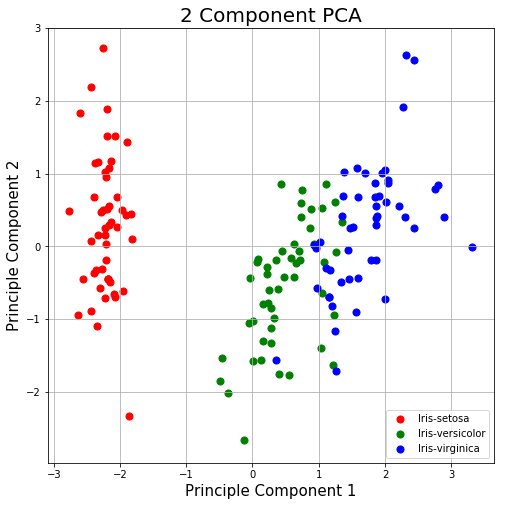

In [17]:
# Graphing the first Two Components

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principle Component 1', fontsize=15)
ax.set_ylabel('Principle Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(
        finalDf.loc[indicesToKeep, 'principle component 1'],
        finalDf.loc[indicesToKeep, 'principle component 2'],
        c = color,
        s = 50
    )
ax.legend(targets)
ax.grid()
plt.show()

# Clustering
Let's try to cluster this data with the PCA reduction and see what the elbow graph looks like

### Terminology
* **within-cluster sum of squares**: a measure of the variability within each cluster. Sum of squared distances of samples to their closest cluster center

### Arguments in KMeans
We use the default values for these, so we only set n_clusters
* **init**: Method for initializing the cluster centers. 'k-means++' is default and is a smart way to choose the clusters. It speeds up convergence. Can also do 'random' or an ndarray, where you define the cluster centers
* **n_init**: Number of times the k-means algorithm is run with different centroid seeds. Default is 10
* **max_iter**: Maximum number of iterations of the k-means algorithm for a single run. Default 300

### KMeans Attributes
* **cluster\_centers\_**: Coordinates of the cluster centers
* **labels_**: Labels of each point
* **inertia_**: Sum of squared distances of samples to their closest cluster center (wcss)
* **n\_iter\_**: Number of iterations run

In [18]:
# Lets try splitting our data into 2 clusters and seeing the attributes
kmeans = KMeans(n_clusters = 2)

In [19]:
# We fit not on x but on the principle component scores. Performing PCA on data before clustering often improves the cluster quality because it removes noise
kmeans.fit_predict(Z)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
kmeans.cluster_centers_

array([[-2.22019328,  0.29222482, -0.04395511],
       [ 1.11009664, -0.14611241,  0.02197756]])

In [21]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
kmeans.inertia_

220.66492377941967

In [23]:
kmeans.n_iter_

2

## Choosing the Right Number of Clusters with the Elbow Method
We already know that the correct number of clusters is 3, but let's see how this holds up

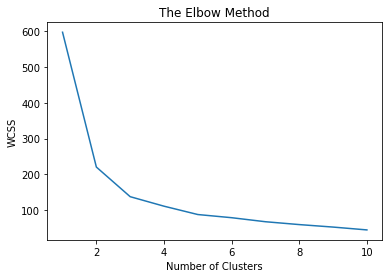

In [24]:
wcss = [] # within-cluster sum of squares

# Lets try to calculate the wcss from having 1 cluster to 11 clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)

# Lets plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The "elbow" is where we find the optimum number of clusters. It's where the WCSS doesn't decrease significantly with every iteration. We can see that 3 is a good choice for the number of clusters

## Using the Silhouette Method to Choose the Right Number of Clusters

Silhouette analysis studies the separation distance between the resulting clusters. It calculates a measure of how close each point in one cluster is to points in the neighboring clusters. This measure, called a silhouette coefficient, has a range of [-1, 1]. 

Silhouette coeffients near +1 indicate that the sample is far away from neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between neighboring clusters, and a negative value indicates that those samples might have been assigned to the wrong cluster. 

When choosing the number of clusters, we want to have a high average silhouette coefficient. 

![Silhouette Method](https://uc-r.github.io/public/images/analytics/clustering/kmeans/unnamed-chunk-14-1.png)

![Silhouette 2 Clusters](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_001.png)
![Silhouette 4 Clusters](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_003.png)

In [37]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_analysis(X, max_n_clusters, min_n_clusters = 2, sample_size = None):
    """
    This function calculates the average silhouette score for a range of n_clusters
    It also plots the silhouette coefficients and the clusters
    This code is taken from: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
    """
    for n_clusters in range(min_n_clusters, max_n_clusters + 1):
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        
        # If X has many samples, you can use the sample_size parameter in silhouette_samples to prevent 
        # computing the score for each sample
        silhouette_avg = silhouette_score(X, cluster_labels, sample_size = sample_size)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.584345522257
For n_clusters = 3 The average silhouette_score is : 0.464523477726
For n_clusters = 4 The average silhouette_score is : 0.39422517713
For n_clusters = 5 The average silhouette_score is : 0.352327006546


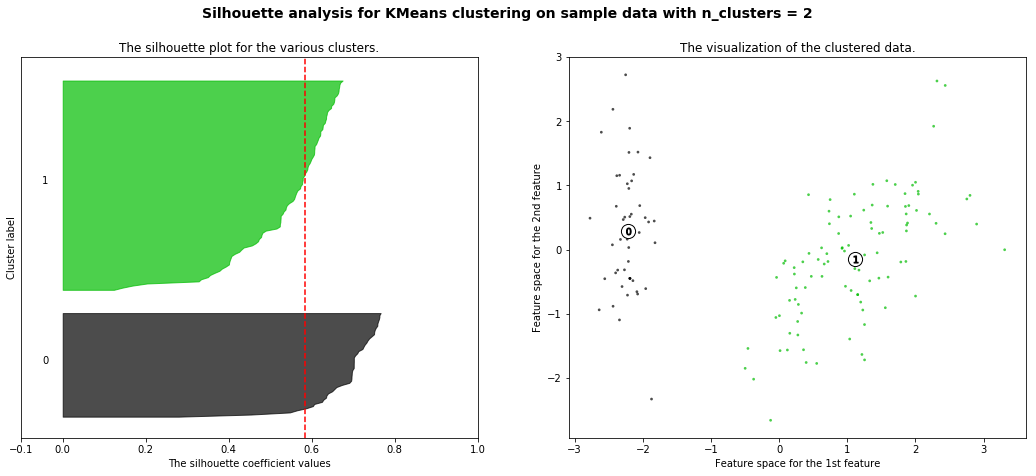

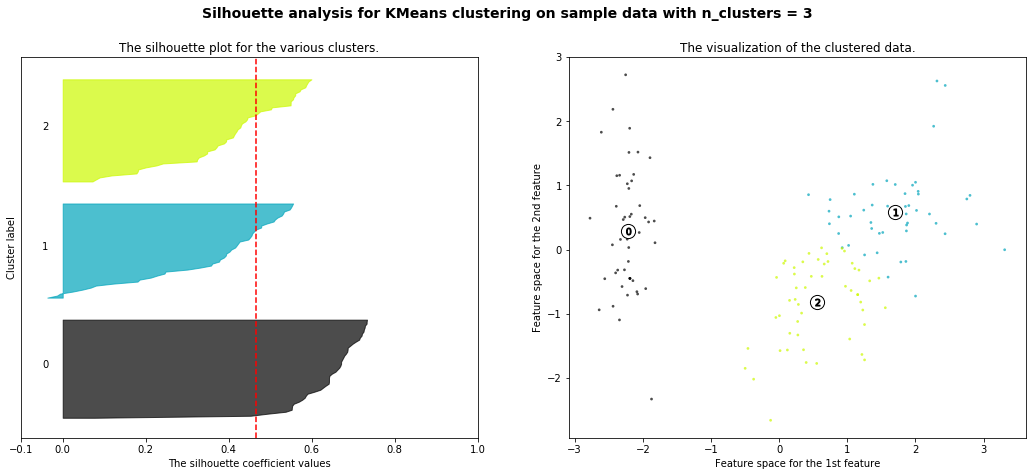

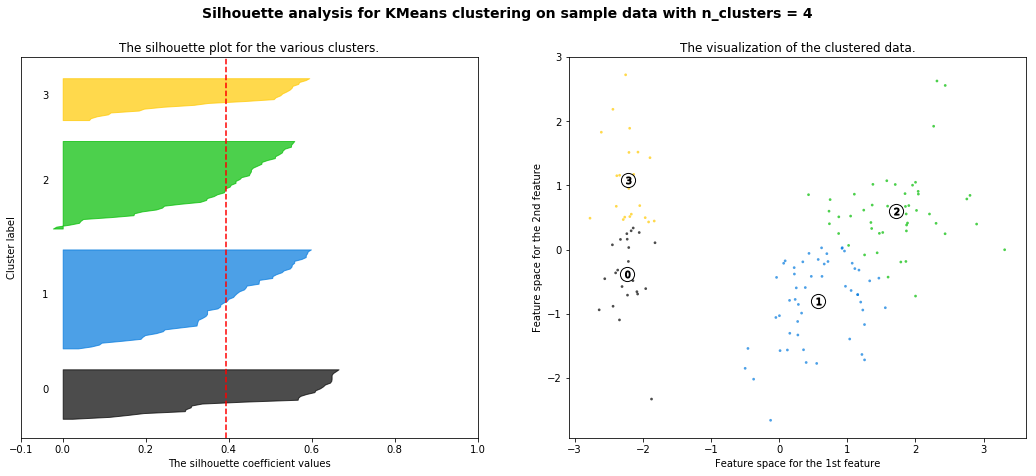

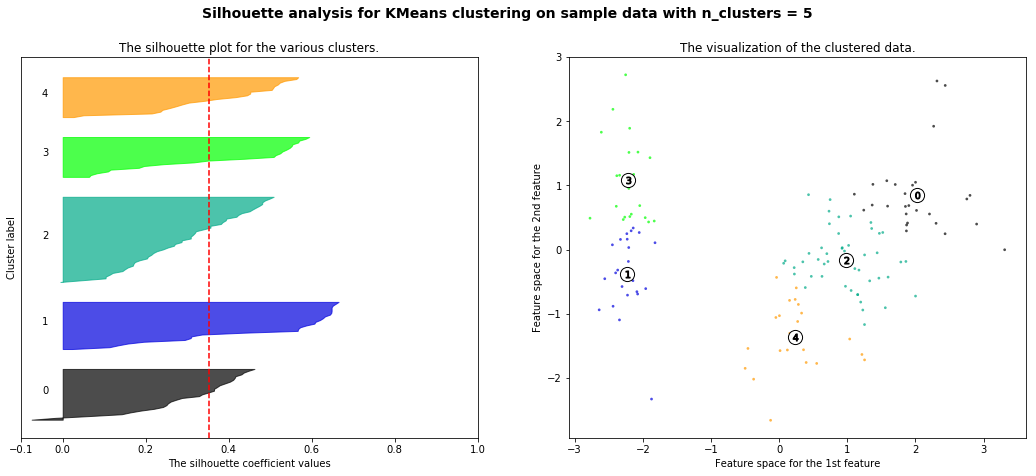

In [38]:
silhouette_analysis(Z, 5)

The silhouette analysis suggests choosing 2 clusters, as we can see that two of the iris types are quite similar from plotting the PCA components earlier. It's ideal to use both the elbow method and silhouette analysis to choose a number of clusters

## KMeans on Original Data

In [39]:
# We can also decide to run kmeans on the non-reduced data
kmeans_orig = KMeans(n_clusters=3)
y_kmeans1 = kmeans_orig.fit_predict(X)

In [40]:
kmeans_orig.inertia_

140.96581663074699

In [41]:
kmeans_orig.cluster_centers_

array([[ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

In [42]:
y_kmeans1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [43]:
# Let's check the accuracy
relabeled = ['Iris-setosa' if label == 1 else label for label in y_kmeans1]
relabeled = ['Iris-versicolor' if label == 2 else label for label in relabeled]
relabeled = ['Iris-virginica' if label == 0 else label for label in relabeled]
sum(finalDf['target'].values == relabeled) / len(finalDf['target'].values)

0.83333333333333337

## KMeans on PCA Reduced Data

In [44]:
# Let's check the inertia and accuracy if we do kmeans on the reduced data
kmeans_pca = KMeans(n_clusters=3)
y_kmeans2 = kmeans_pca.fit_predict(Z)

In [45]:
# This has a lower inertia than when we do it on the original data
kmeans_pca.inertia_

137.97308684244524

In [46]:
y_kmeans2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [48]:
relabeled = ['Iris-setosa' if label == 0 else label for label in y_kmeans2]
relabeled = ['Iris-versicolor' if label == 1 else label for label in relabeled]
relabeled = ['Iris-virginica' if label == 2 else label for label in relabeled]
# Let's see how accurate the clustering was
sum(finalDf['target'].values == relabeled) / len(finalDf['target'].values)

0.83333333333333337

Using PCA before KMeans has pretty much the same accuracy as not using it, so it's not a conclusive benefit

In [49]:
y_kmeans = y_kmeans2

## Given a new data point, can we guess what Iris type it is?
Our new data point $x_{new}$ has to first be transformed by the StandardScaler and then we use our general formula $Z = XV$ to get the data point in PCA space

In [50]:
# This is a data point for Iris Setosa. Let's see if we get what we expect
x_new = np.array([4.7, 3.2, 1.3, 0.2]).reshape(1, -1)

In [51]:
scaled_point = scaler.transform(x_new)

In [52]:
pca_x = np.dot(scaled_point, V)
pca_x

array([[-2.36795045, -0.31847731,  0.05147962]])

In [53]:
kmeans_pca.predict(pca_x)

array([0])

It correctly predicts that this point belongs to the Iris Setosa cluster

# Mapping the Cluster Centers Back to Original Features
The cluster center coordinates are abstracted because they are in PCA space instead of our original feature space. To make it easier to interpret, we can map the cluster coordinates back to the original space using $\hat{X} = ZV^T$ where $Z$ is a $i \times k$ matrix, where $i$ is the number of points you want to transform back to the original space. $\hat{X}$ will be an $i \times p$ matrix. $\hat{X}$ will still be scaled from the StandardScaler, so we also have to reverse its transform

In [55]:
Z_centers = kmeans_pca.cluster_centers_

In [56]:
Z_centers

array([[-2.22019328,  0.29222482, -0.04395511],
       [ 0.56713803, -0.8076751 ,  0.05088645],
       [ 1.72236912,  0.59990509, -0.01062183]])

In [57]:
X_hat = scaler.inverse_transform(np.dot(Z_centers, V.T))
X_hat

array([[ 5.00212608,  3.4189611 ,  1.48924122,  0.2368655 ],
       [ 5.80937594,  2.67172688,  4.32101446,  1.4270001 ],
       [ 6.77652705,  3.09681745,  5.53881218,  1.96437701]])

In [60]:
data = np.append(X_hat, [['Iris-setosa'], ['Iris-versicolor'], ['Iris-Virginica']], 1)

In [61]:
cluster_df = pd.DataFrame(data=data, columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
cluster_df

,sepal length,sepal width,petal length,petal width,target
0,5.002126075504432,3.4189611016336228,1.4892412223284244,0.23686550483144364,Iris-setosa
1,5.809375944659443,2.67172688379432,4.321014459557557,1.4270001030897275,Iris-versicolor
2,6.776527045911234,3.096817448451488,5.538812181426132,1.9643770062696233,Iris-Virginica


From the cluster dataframe of the center coordinates projected back to the original space, we see that Iris-setosa is easily distinguishable from the other clusters because of its small petal width and petal length. This would have been hard to see if we were only looking at the PCA space cluster coordinates

In [62]:
# If we didn't use PCA, we can easily see the cluster centers like so
# Keep in mind that the order of these cluster centers can be different from kmeans_pca
scaler.inverse_transform(kmeans_orig.cluster_centers_)

array([[ 6.78085106,  3.09574468,  5.5106383 ,  1.97234043],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 5.80188679,  2.67358491,  4.36981132,  1.41320755]])